####Student ID- 2605281C
####Project Title- Estimating and Optimizing the Environmental Footprint of Big Data Applications

###DATA PREPROCESSING


In [2]:
# cloning the github repository
!git clone https://github.com/oxhead/scout.git

Cloning into 'scout'...
remote: Enumerating objects: 52915, done.
remote: Total 52915 (delta 0), reused 0 (delta 0), pack-reused 52915
Receiving objects: 100% (52915/52915), 575.63 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (12300/12300), done.
Checking out files: 100% (41870/41870), done.


In [3]:
import os
os.chdir('/content/scout/dataset/osr_multiple_nodes')

In [4]:
# importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn import utils
import re
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# storing the json files
json_path = []
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if file.endswith(".json"):
            json_path.append(os.path.join(root, file))

In [6]:
print(len(json_path))

1242


In [7]:
print(json_path)

['/content/scout/dataset/osr_multiple_nodes/48_m4.large_naive-bayes_spark1.5_bigdata_1/report.json', '/content/scout/dataset/osr_multiple_nodes/20_m4.xlarge_pagerank_spark_bigdata_1/report.json', '/content/scout/dataset/osr_multiple_nodes/16_r4.large_regression_spark1.5_huge_1/report.json', '/content/scout/dataset/osr_multiple_nodes/8_r4.2xlarge_kmeans_spark1.5_bigdata_1/report.json', '/content/scout/dataset/osr_multiple_nodes/24_m4.large_pagerank_spark_huge_1/report.json', '/content/scout/dataset/osr_multiple_nodes/4_m4.2xlarge_kmeans_spark1.5_huge_1/report.json', '/content/scout/dataset/osr_multiple_nodes/4_c4.xlarge_kmeans_spark1.5_huge_1/report.json', '/content/scout/dataset/osr_multiple_nodes/4_r4.2xlarge_pagerank_hadoop_huge_1/report.json', '/content/scout/dataset/osr_multiple_nodes/6_c4.xlarge_regression_spark1.5_bigdata_1/report.json', '/content/scout/dataset/osr_multiple_nodes/16_c4.large_pagerank_spark_huge_1/report.json', '/content/scout/dataset/osr_multiple_nodes/16_r4.xlar

In [8]:
# Printing the number of nodes present per virtual machine (VM) instance.
nodes = []
for file in json_path:
  item = file.split("/") 
  item = item[5]
  node = re.findall('^[^_]+(?=_)', item)
  node = node[0]
  node = int(node)
  nodes.append(node)
print(nodes)
print(len(nodes))

[48, 20, 16, 8, 24, 4, 4, 4, 6, 16, 16, 32, 10, 8, 20, 12, 24, 4, 8, 8, 12, 8, 10, 32, 6, 8, 10, 10, 4, 8, 4, 6, 32, 12, 40, 6, 24, 12, 40, 6, 48, 48, 10, 10, 10, 40, 8, 10, 6, 6, 4, 24, 8, 24, 20, 12, 12, 20, 12, 4, 8, 48, 12, 4, 8, 8, 24, 8, 4, 12, 6, 40, 6, 10, 16, 48, 16, 4, 10, 10, 4, 24, 6, 4, 6, 48, 8, 32, 24, 8, 12, 10, 4, 16, 20, 4, 32, 6, 48, 4, 12, 10, 8, 6, 4, 40, 6, 24, 12, 6, 12, 4, 12, 12, 4, 24, 40, 12, 16, 4, 8, 12, 10, 8, 12, 10, 20, 24, 40, 4, 10, 16, 32, 8, 10, 10, 24, 12, 32, 40, 20, 24, 10, 8, 32, 10, 6, 12, 12, 12, 4, 4, 6, 20, 4, 16, 10, 48, 48, 8, 6, 16, 12, 4, 4, 32, 4, 16, 24, 8, 6, 8, 10, 16, 16, 16, 4, 8, 40, 8, 4, 4, 12, 12, 40, 4, 24, 12, 20, 6, 8, 4, 8, 4, 24, 4, 20, 6, 16, 16, 6, 40, 4, 24, 8, 4, 48, 20, 32, 12, 12, 24, 8, 10, 6, 12, 6, 16, 8, 40, 10, 32, 6, 4, 4, 40, 8, 12, 10, 4, 12, 8, 6, 6, 8, 16, 12, 4, 10, 10, 16, 8, 6, 12, 24, 10, 24, 32, 10, 40, 4, 6, 20, 10, 4, 8, 10, 4, 48, 4, 48, 10, 12, 24, 6, 8, 10, 12, 4, 6, 6, 40, 40, 16, 24, 10, 20, 40, 

In [9]:
frame = pd.read_json(json_path[0], orient ='index')

In [10]:
frame.head()

,0
completed,True
datasize,bigdata
elapsed_time,650.802349
framework,spark1.5
input_size,-1


In [11]:
df1_transposed = frame.T

In [12]:
df1_transposed

,completed,datasize,elapsed_time,framework,input_size,program,throughput_cluster,throughput_node,timestamp,workload
0,True,bigdata,650.802349,spark1.5,-1,naive-bayes,-1,-1,2018-01-07 11:17:44,naive-bayes


In [13]:
# creating a list of dataframes generated from the json files and transposing them.
frames = []
for path in json_path:
  frame = pd.read_json(path, orient ='index')
  frame = frame.T
  frames.append(frame)

In [14]:
frames[0].head()

,completed,datasize,elapsed_time,framework,input_size,program,throughput_cluster,throughput_node,timestamp,workload
0,True,bigdata,650.802349,spark1.5,-1,naive-bayes,-1,-1,2018-01-07 11:17:44,naive-bayes


In [15]:
len(frames)

1242

In [16]:
# Combining the dataframes in the frames list
new_df = pd.concat(frames)

In [17]:
new_df.head()

,completed,datasize,elapsed_time,framework,input_size,program,throughput_cluster,throughput_node,timestamp,workload
0,True,bigdata,650.802349,spark1.5,-1,naive-bayes,-1,-1,2018-01-07 11:17:44,naive-bayes
0,True,bigdata,357.074,spark,6104130678,ScalaSparkPagerank,17094861,854743,2018-01-06 18:47:01,pagerank
0,False,huge,150.269648,spark1.5,-1,regression,-1,-1,2018-01-05 18:46:42,regression
0,True,bigdata,313.755333,spark1.5,-1,kmeans,-1,-1,2018-01-05 00:41:53,kmeans
0,True,huge,296.716,spark,2993552826,ScalaSparkPagerank,10088949,420372,2018-01-06 17:58:19,pagerank


In [18]:
# appending the nodes from the file path
new_df["Nodes"] = nodes

In [19]:
# rearranging the columns.
scale_out_data = new_df[['timestamp','Nodes', 'framework', 'program', 'workload', 'datasize', 'elapsed_time', 'input_size', 'throughput_cluster', 'throughput_node', 'completed']]

In [20]:
scale_out_data.head()

,timestamp,Nodes,framework,program,workload,datasize,elapsed_time,input_size,throughput_cluster,throughput_node,completed
0,2018-01-07 11:17:44,48,spark1.5,naive-bayes,naive-bayes,bigdata,650.802349,-1,-1,-1,True
0,2018-01-06 18:47:01,20,spark,ScalaSparkPagerank,pagerank,bigdata,357.074,6104130678,17094861,854743,True
0,2018-01-05 18:46:42,16,spark1.5,regression,regression,huge,150.269648,-1,-1,-1,False
0,2018-01-05 00:41:53,8,spark1.5,kmeans,kmeans,bigdata,313.755333,-1,-1,-1,True
0,2018-01-06 17:58:19,24,spark,ScalaSparkPagerank,pagerank,huge,296.716,2993552826,10088949,420372,True


In [21]:
scale_out_data.shape

(1242, 11)

In [22]:
scale_out_data = scale_out_data.reset_index(drop=True)

In [23]:
scale_out_data.head(3)

,timestamp,Nodes,framework,program,workload,datasize,elapsed_time,input_size,throughput_cluster,throughput_node,completed
0,2018-01-07 11:17:44,48,spark1.5,naive-bayes,naive-bayes,bigdata,650.802349,-1,-1,-1,True
1,2018-01-06 18:47:01,20,spark,ScalaSparkPagerank,pagerank,bigdata,357.074,6104130678,17094861,854743,True
2,2018-01-05 18:46:42,16,spark1.5,regression,regression,huge,150.269648,-1,-1,-1,False


In [24]:
machine_type = []
for path in json_path:
  if path.find("c4.2xlarge") != -1:
    machine_type.append("c4.2xlarge")
  elif path.find("c4.large") != -1:
    machine_type.append("c4.large")
  elif path.find("c4.xlarge") != -1:
    machine_type.append("c4.xlarge")
  elif path.find("m4.2xlarge") != -1:
    machine_type.append("m4.2xlarge")
  elif path.find("m4.large") != -1:
    machine_type.append("m4.large")
  elif path.find("m4.xlarge") != -1:
    machine_type.append("m4.xlarge")
  elif path.find("r4.2xlarge") != -1:
    machine_type.append("r4.2xlarge")
  elif path.find("r4.large") != -1:
    machine_type.append("r4.large")
  elif path.find("r4.xlarge") != -1:
    machine_type.append("r4.xlarge")


In [25]:
# appending machine types to the corresponding scaleout data entries.
scale_out_data["machine_type"] = machine_type

In [26]:
scale_out_data = scale_out_data[['timestamp','Nodes', 'machine_type', 'framework', 'program', 'workload', 'datasize', 'elapsed_time', 'input_size', 'throughput_cluster', 'throughput_node', 'completed']]

In [27]:
scale_out_data.head(3)

,timestamp,Nodes,machine_type,framework,program,workload,datasize,elapsed_time,input_size,throughput_cluster,throughput_node,completed
0,2018-01-07 11:17:44,48,m4.large,spark1.5,naive-bayes,naive-bayes,bigdata,650.802349,-1,-1,-1,True
1,2018-01-06 18:47:01,20,m4.xlarge,spark,ScalaSparkPagerank,pagerank,bigdata,357.074,6104130678,17094861,854743,True
2,2018-01-05 18:46:42,16,r4.large,spark1.5,regression,regression,huge,150.269648,-1,-1,-1,False


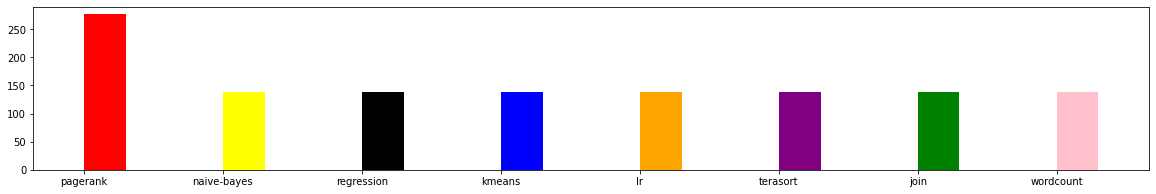

In [28]:
# Plotting the workload and checking if the data collection was even across all programs
c = ['red', 'yellow', 'black', 'blue', 'orange', 'purple', 'green', 'pink']
h = scale_out_data["workload"].value_counts().tolist()
values = scale_out_data['workload'].value_counts().keys().tolist()

plt.figure(figsize=(20, 3)) 
plt.bar(values, height = h, color = c, align='edge', width=0.3)
plt.show()


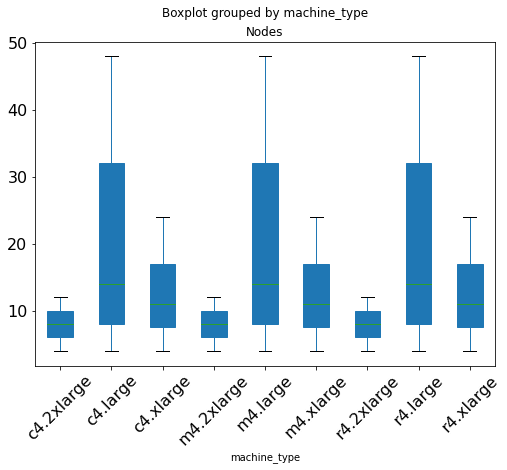

In [29]:
# Creating boxplot of machine types against the nodes.
bplot = scale_out_data.boxplot(by="machine_type", column="Nodes", positions=[1,2,3,4,5,6,7,8,9], 
                     return_type='dict', figsize=(8,6), grid=False, patch_artist=True, 
                     sym='d', fontsize=16, rot=45)

# 

In [30]:
foot_print_data = scale_out_data.copy()

## Predicting Runtime using Gradient Boosting.
##### The ML model is be able to make a runtime prediction given the following attributes of a vm instance: The number of nodes, machine type, framework, program type running in the vm, workload, datasize, throughput cluster, throughput node and a flag indicating if the vm instance execution was finished or not.

##### Feature Engineering.

In [31]:
# Dropping the timestamp
scale_out_data = scale_out_data.drop(["timestamp"], axis=1)

In [32]:
scale_out_data.head()

,Nodes,machine_type,framework,program,workload,datasize,elapsed_time,input_size,throughput_cluster,throughput_node,completed
0,48,m4.large,spark1.5,naive-bayes,naive-bayes,bigdata,650.802349,-1,-1,-1,True
1,20,m4.xlarge,spark,ScalaSparkPagerank,pagerank,bigdata,357.074,6104130678,17094861,854743,True
2,16,r4.large,spark1.5,regression,regression,huge,150.269648,-1,-1,-1,False
3,8,r4.2xlarge,spark1.5,kmeans,kmeans,bigdata,313.755333,-1,-1,-1,True
4,24,m4.large,spark,ScalaSparkPagerank,pagerank,huge,296.716,2993552826,10088949,420372,True


In [33]:
# Conducting one-hot encoding on the categorical columns.
oe_style = OneHotEncoder()
# encode machine type
machine_encode = oe_style.fit_transform(scale_out_data[["machine_type"]])
# join the result to original dataframe
scale_out_data = scale_out_data.join(pd.DataFrame(machine_encode.toarray(), columns=oe_style.categories_))

In [34]:
# encode framework
framework_encode = oe_style.fit_transform(scale_out_data[["framework"]])
# join the result to original dataframe
scale_out_data = scale_out_data.join(pd.DataFrame(framework_encode.toarray(), columns=oe_style.categories_))

# encode program
program_encode = oe_style.fit_transform(scale_out_data[["program"]])
# join the result to original dataframe
scale_out_data = scale_out_data.join(pd.DataFrame(program_encode.toarray(), columns=oe_style.categories_))

# # encode workload
# workload_encode = oe_style.fit_transform(scale_out_data[["workload"]])
# # join the result to original dataframe
# scale_out_data = scale_out_data.join(pd.DataFrame(workload_encode.toarray(), columns=oe_style.categories_))

# encode datasize
datasize_encode = oe_style.fit_transform(scale_out_data[["datasize"]])
# join the result to original dataframe
scale_out_data = scale_out_data.join(pd.DataFrame(datasize_encode.toarray(), columns=oe_style.categories_))

# encode completed.
completed_encode = oe_style.fit_transform(scale_out_data[["completed"]])
# join the result to original dataframe
scale_out_data = scale_out_data.join(pd.DataFrame(completed_encode.toarray(), columns=oe_style.categories_))


In [35]:
scale_out_data.head(3)

,Nodes,machine_type,framework,program,workload,datasize,elapsed_time,input_size,throughput_cluster,throughput_node,...,"(LogisticRegression,)","(ScalaSparkJoin,)","(ScalaSparkPagerank,)","(kmeans,)","(naive-bayes,)","(regression,)","(bigdata,)","(huge,)","(False,)","(True,)"
0,48,m4.large,spark1.5,naive-bayes,naive-bayes,bigdata,650.802349,-1,-1,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,20,m4.xlarge,spark,ScalaSparkPagerank,pagerank,bigdata,357.074,6104130678,17094861,854743,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,16,r4.large,spark1.5,regression,regression,huge,150.269648,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [36]:
# Dropping the columns that have already been encoded.
scale_out_data = scale_out_data.drop(["machine_type", "framework", "program", "workload", "datasize", "completed"], axis=1)

In [37]:
scale_out_data.head()

,Nodes,elapsed_time,input_size,throughput_cluster,throughput_node,"(c4.2xlarge,)","(c4.large,)","(c4.xlarge,)","(m4.2xlarge,)","(m4.large,)",...,"(LogisticRegression,)","(ScalaSparkJoin,)","(ScalaSparkPagerank,)","(kmeans,)","(naive-bayes,)","(regression,)","(bigdata,)","(huge,)","(False,)","(True,)"
0,48,650.802349,-1,-1,-1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,20,357.074,6104130678,17094861,854743,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,16,150.269648,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,8,313.755333,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,296.716,2993552826,10088949,420372,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
# Checking for missing values.
scale_out_data.isnull().values.any()

False

In [39]:
# Splitting the dataset into training and testing sets.
y_train = scale_out_data["elapsed_time"].astype('float')

In [40]:
y_train.head()

0    650.802349
1    357.074000
2    150.269648
3    313.755333
4    296.716000
Name: elapsed_time, dtype: float64

In [41]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [42]:
print(y_transformed[:5])

[455 193  10 137 119]


In [43]:
scale_out_data["input_size"] = pd.to_numeric(scale_out_data["input_size"])
scale_out_data["throughput_cluster"] = pd.to_numeric(scale_out_data["throughput_cluster"])
scale_out_data["throughput_node"] = pd.to_numeric(scale_out_data["throughput_node"])

In [44]:
scale_out_data.dtypes

Nodes                      int64
elapsed_time              object
input_size                 int64
throughput_cluster         int64
throughput_node            int64
(c4.2xlarge,)            float64
(c4.large,)              float64
(c4.xlarge,)             float64
(m4.2xlarge,)            float64
(m4.large,)              float64
(m4.xlarge,)             float64
(r4.2xlarge,)            float64
(r4.large,)              float64
(r4.xlarge,)             float64
(hadoop,)                float64
(spark,)                 float64
(spark1.5,)              float64
(,)                      float64
(HadoopPagerank,)        float64
(HadoopTerasort,)        float64
(HadoopWordcount,)       float64
(LogisticRegression,)    float64
(ScalaSparkJoin,)        float64
(ScalaSparkPagerank,)    float64
(kmeans,)                float64
(naive-bayes,)           float64
(regression,)            float64
(bigdata,)               float64
(huge,)                  float64
(False,)                 float64
(True,)   

In [45]:
# scaling the dataset.
scaler = MinMaxScaler()
X_train = scale_out_data.select_dtypes(exclude=['object'])

In [46]:
# X_train.set_index("input_size", inplace=True)

In [47]:
X_train.head()

,Nodes,input_size,throughput_cluster,throughput_node,"(c4.2xlarge,)","(c4.large,)","(c4.xlarge,)","(m4.2xlarge,)","(m4.large,)","(m4.xlarge,)",...,"(LogisticRegression,)","(ScalaSparkJoin,)","(ScalaSparkPagerank,)","(kmeans,)","(naive-bayes,)","(regression,)","(bigdata,)","(huge,)","(False,)","(True,)"
0,48,-1,-1,-1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,20,6104130678,17094861,854743,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,16,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,8,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,2993552826,10088949,420372,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [48]:
X_train = X_train.astype("float")
X_train.dtypes

Nodes                    float64
input_size               float64
throughput_cluster       float64
throughput_node          float64
(c4.2xlarge,)            float64
(c4.large,)              float64
(c4.xlarge,)             float64
(m4.2xlarge,)            float64
(m4.large,)              float64
(m4.xlarge,)             float64
(r4.2xlarge,)            float64
(r4.large,)              float64
(r4.xlarge,)             float64
(hadoop,)                float64
(spark,)                 float64
(spark1.5,)              float64
(,)                      float64
(HadoopPagerank,)        float64
(HadoopTerasort,)        float64
(HadoopWordcount,)       float64
(LogisticRegression,)    float64
(ScalaSparkJoin,)        float64
(ScalaSparkPagerank,)    float64
(kmeans,)                float64
(naive-bayes,)           float64
(regression,)            float64
(bigdata,)               float64
(huge,)                  float64
(False,)                 float64
(True,)                  float64
dtype: obj

In [49]:
X_train = scaler.fit_transform(X_train)

In [50]:
# splitting the dataset into train and testing.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_transformed, test_size=0.30, random_state=1)

In [51]:
# Checking for best learnig rates.
learning_rates = [0.0001, 0.05, 0.075, 0.1]

for rate in learning_rates:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.0001
Accuracy score (training): 0.440
Accuracy score (validation): 0.000
Learning rate:  0.05
Accuracy score (training): 0.165
Accuracy score (validation): 0.000
Learning rate:  0.075
Accuracy score (training): 0.022
Accuracy score (validation): 0.000
Learning rate:  0.1
Accuracy score (training): 0.002
Accuracy score (validation): 0.000


In [52]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.001, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          33       0.00      

In [53]:
runtimeprediction = pd.DataFrame (predictions, columns = ['Runtime'])

In [54]:
runtimeprediction.head(10)

,Runtime
0,1123
1,383
2,74
3,792
4,714
5,812
6,1065
7,57
8,995
9,971


In [55]:
len(X_val)

373

In [56]:
len(predictions)

373

In [57]:
runtimeprediction.shape

(373, 1)

## Prediction of Resource Utilization using Logistic Regression.
###### The model is able to make a resource prediction given a specific number of Nodes.


In [58]:
# Initializing estimated instance power consumptions from the footprint dataset.
idle = [5,1]
percent_10 = [8,5]
percent_50 = [13,8]
percent_100 = [18,0]

In [59]:
for workload in idle:
  print(workload)

5
1


In [60]:
work_load_dataset = foot_print_data[:373]

In [61]:
work_load_dataset["runtime"] = runtimeprediction['Runtime'].to_numpy()

In [62]:
work_load_dataset.head()

,timestamp,Nodes,machine_type,framework,program,workload,datasize,elapsed_time,input_size,throughput_cluster,throughput_node,completed,runtime
0,2018-01-07 11:17:44,48,m4.large,spark1.5,naive-bayes,naive-bayes,bigdata,650.802349,-1,-1,-1,True,1123
1,2018-01-06 18:47:01,20,m4.xlarge,spark,ScalaSparkPagerank,pagerank,bigdata,357.074,6104130678,17094861,854743,True,383
2,2018-01-05 18:46:42,16,r4.large,spark1.5,regression,regression,huge,150.269648,-1,-1,-1,False,74
3,2018-01-05 00:41:53,8,r4.2xlarge,spark1.5,kmeans,kmeans,bigdata,313.755333,-1,-1,-1,True,792
4,2018-01-06 17:58:19,24,m4.large,spark,ScalaSparkPagerank,pagerank,huge,296.716,2993552826,10088949,420372,True,714


In [63]:
# selecting the timestamp, machine type and the runtime to enable us do calculations.
work_load_datase = work_load_dataset[["timestamp", "Nodes", "machine_type","elapsed_time", "runtime"]]

In [64]:
work_load_datase.head()

,timestamp,Nodes,machine_type,elapsed_time,runtime
0,2018-01-07 11:17:44,48,m4.large,650.802349,1123
1,2018-01-06 18:47:01,20,m4.xlarge,357.074,383
2,2018-01-05 18:46:42,16,r4.large,150.269648,74
3,2018-01-05 00:41:53,8,r4.2xlarge,313.755333,792
4,2018-01-06 17:58:19,24,m4.large,296.716,714


In [65]:
work_load_datase["machine_type"].value_counts()

m4.large      62
r4.large      56
c4.xlarge     45
c4.large      45
r4.xlarge     44
m4.xlarge     39
m4.2xlarge    33
c4.2xlarge    27
r4.2xlarge    22
Name: machine_type, dtype: int64

In [66]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
# importing the footprint dataset.
try:
  footprint = pd.read_excel('/content/drive/MyDrive/SparkAnalysis/footprint.xlsx')
  print("Success")
except Exception as e:
  print(e)

Success


In [68]:
footprint.head(10)

,machine_type,InstanceIdle,idletime,Instance10%,time10%,Instance50%,time50%,Instance100%,time100%
0,c4.large,5.0,1.0,8.0,5.0,13.0,8.0,18.0,0.0
1,c4.xlarge,10.0,2.0,16.0,9.0,27.0,5.0,36.0,1.0
2,c4.2xlarge,20.0,3.0,33.0,9.0,55.0,0.0,72.0,1.0
3,m4.large,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
4,m4.xlarge,8.0,4.0,13.0,6.0,21.0,0.0,28.0,4.0
5,m4.2xlarge,16.0,7.0,27.0,1.0,42.0,1.0,56.0,9.0
6,r4.large,5.0,6.0,9.0,0.0,13.0,4.0,18.0,6.0
7,r4.xlarge,11.0,3.0,17.0,9.0,26.0,8.0,37.0,1.0
8,r4.2xlarge,22.0,5.0,35.0,8.0,53.0,7.0,74.0,3.0


In [69]:
# merging the datasets as per the machine_type column.
final_footprint = work_load_datase.merge(footprint, on="machine_type", how="inner")

In [70]:
final_footprint.head()

,timestamp,Nodes,machine_type,elapsed_time,runtime,InstanceIdle,idletime,Instance10%,time10%,Instance50%,time50%,Instance100%,time100%
0,2018-01-07 11:17:44,48,m4.large,650.802349,1123,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
1,2018-01-06 17:58:19,24,m4.large,296.716,714,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
2,2018-01-05 17:19:58,12,m4.large,1009.791,1016,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
3,2018-01-05 23:51:39,4,m4.large,6819.545506,124,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
4,2018-01-06 10:05:52,10,m4.large,1749.412,978,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0


In [71]:
# defining the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300)

In [72]:
# dropping the timestamp and machine type columns.
final_footprint = final_footprint.drop(["timestamp", "machine_type"], axis=1)

In [73]:
final_footprint.head()

,Nodes,elapsed_time,runtime,InstanceIdle,idletime,Instance10%,time10%,Instance50%,time50%,Instance100%,time100%
0,48,650.802349,1123,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
1,24,296.716,714,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
2,12,1009.791,1016,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
3,4,6819.545506,124,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0
4,10,1749.412,978,4.0,2.0,6.0,8.0,10.0,5.0,14.0,2.0


In [74]:
# Defining target and independent variables.
Y = final_footprint["Nodes"]
X = final_footprint.loc[:, final_footprint.columns != "Nodes"]
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [75]:
Y.shape

(373,)

In [76]:
X.shape

(373, 381)

In [77]:
# Splitting the data into train and test.
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.30, random_state=1)

In [78]:
# Fitting the logistic regression model.
model.fit(X_train,y_train)

LogisticRegression(max_iter=300, multi_class='multinomial')

In [79]:
# making prdictions.
y_pred_train = model.predict(X_val)

In [80]:
y_pred_train[:10]

array([12, 10,  8, 24, 12, 40,  6,  8, 12,  8])

In [81]:
len(y_pred_train)

112

In [82]:
# defining function to print confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True)
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

           4       0.10      0.12      0.11        17
           6       0.38      0.25      0.30        12
           8       0.00      0.00      0.00        18
          10       0.06      0.17      0.09        12
          12       0.07      0.06      0.06        16
          16       0.00      0.00      0.00        10
          20       0.00      0.00      0.00         6
          24       0.11      0.11      0.11         9
          32       0.14      0.25      0.18         4
          40       0.00      0.00      0.00         4
          48       0.14      0.25      0.18         4

    accuracy                           0.10       112
   macro avg       0.09      0.11      0.09       112
weighted avg       0.09      0.10      0.09       112



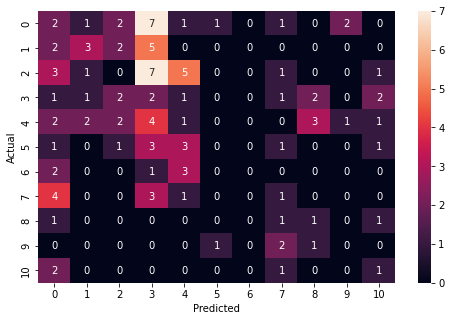

In [83]:
# Getting the consfusion matrix and accuracy values.
metrics_score(y_val, y_pred_train)

In [84]:
resources = model.predict(X)

In [85]:
resources[:10]

array([48, 24, 48,  4, 48, 48, 48, 48, 48, 48])

In [86]:
len(resources)

373

## Calculation of Carbon Footprint and Power

In [87]:
final_footprint["resource"] = final_footprint["InstanceIdle"] * final_footprint["Instance10%"] * final_footprint["Instance50%"] * final_footprint["Instance100%"]

In [88]:
final_footprint["resource"].head()

0    3360.0
1    3360.0
2    3360.0
3    3360.0
4    3360.0
Name: resource, dtype: float64

In [89]:
# calculating the power given the resource and runtime.
final_footprint["power"] = final_footprint["resource"] / final_footprint["runtime"]

In [90]:
final_footprint["power"]

0          2.991986
1          4.705882
2          3.307087
3         27.096774
4          3.435583
           ...     
368    14204.347826
369     2544.888023
370     6616.708861
371     6684.398977
372    14683.146067
Name: power, Length: 373, dtype: float64

In [91]:
# Now that we have energy, we can convert it into carbon using UK's grid.
final_footprint["Carbon_Footprint"] = (final_footprint["power"] * 1.2 * 228)/1000 + 2.81

In [92]:
# The following are now the resource, power, runtime and carbon emission.
carbon_est = final_footprint[["runtime", "InstanceIdle", "Instance10%", "Instance50%", "Instance100%", "power", "Carbon_Footprint"]]

In [93]:
work_load_datase.head()

,timestamp,Nodes,machine_type,elapsed_time,runtime
0,2018-01-07 11:17:44,48,m4.large,650.802349,1123
1,2018-01-06 18:47:01,20,m4.xlarge,357.074,383
2,2018-01-05 18:46:42,16,r4.large,150.269648,74
3,2018-01-05 00:41:53,8,r4.2xlarge,313.755333,792
4,2018-01-06 17:58:19,24,m4.large,296.716,714


In [94]:
carbon_est.head()

,runtime,InstanceIdle,Instance10%,Instance50%,Instance100%,power,Carbon_Footprint
0,1123,4.0,6.0,10.0,14.0,2.991986,3.628607
1,714,4.0,6.0,10.0,14.0,4.705882,4.097529
2,1016,4.0,6.0,10.0,14.0,3.307087,3.714819
3,124,4.0,6.0,10.0,14.0,27.096774,10.223677
4,978,4.0,6.0,10.0,14.0,3.435583,3.749975


In [95]:
print(carbon_est.shape)
print(work_load_datase.shape)

(373, 7)
(373, 5)


In [96]:
timestamp = work_load_datase["timestamp"]
machine = work_load_datase["machine_type"]
carbon_est = carbon_est.join(timestamp)
carbon_est = carbon_est.join(machine)

In [97]:
carbon_est["scale_out"] = resources

In [98]:
# To get the best footprint, we locate the resource with lowest carbon footprint
carbon_est[carbon_est.Carbon_Footprint == carbon_est.Carbon_Footprint.min()]

,runtime,InstanceIdle,Instance10%,Instance50%,Instance100%,power,Carbon_Footprint,timestamp,machine_type,scale_out
32,1241,4.0,6.0,10.0,14.0,2.707494,3.55077,2018-01-07 01:18:10,r4.large,48


In [99]:
sorted = carbon_est.sort_values(by=["Carbon_Footprint"])

In [100]:
sorted.shape

(373, 10)

In [101]:
sorted.head(30)

,runtime,InstanceIdle,Instance10%,Instance50%,Instance100%,power,Carbon_Footprint,timestamp,machine_type,scale_out
32,1241,4.0,6.0,10.0,14.0,2.707494,3.550770,2018-01-07 01:18:10,r4.large,48
50,1225,4.0,6.0,10.0,14.0,2.742857,3.560446,2018-01-05 09:12:38,r4.2xlarge,48
7,1225,4.0,6.0,10.0,14.0,2.742857,3.560446,2018-01-05 08:34:21,r4.2xlarge,48
41,1185,4.0,6.0,10.0,14.0,2.835443,3.585777,2018-01-07 09:36:19,c4.large,48
0,1123,4.0,6.0,10.0,14.0,2.991986,3.628607,2018-01-07 11:17:44,m4.large,48
6,1123,4.0,6.0,10.0,14.0,2.991986,3.628607,2018-01-05 10:52:57,c4.xlarge,48
49,1074,4.0,6.0,10.0,14.0,3.128492,3.665955,2018-01-06 10:14:18,r4.large,48
25,1065,4.0,6.0,10.0,14.0,3.154930,3.673189,2018-01-04 16:00:45,c4.2xlarge,48
5,1065,4.0,6.0,10.0,14.0,3.154930,3.673189,2018-01-05 09:25:53,m4.2xlarge,48
51,1033,4.0,6.0,10.0,14.0,3.252662,3.699928,2018-01-06 17:50:34,m4.xlarge,48


Text(0, 0.5, 'Carbon Footprint Estimates')

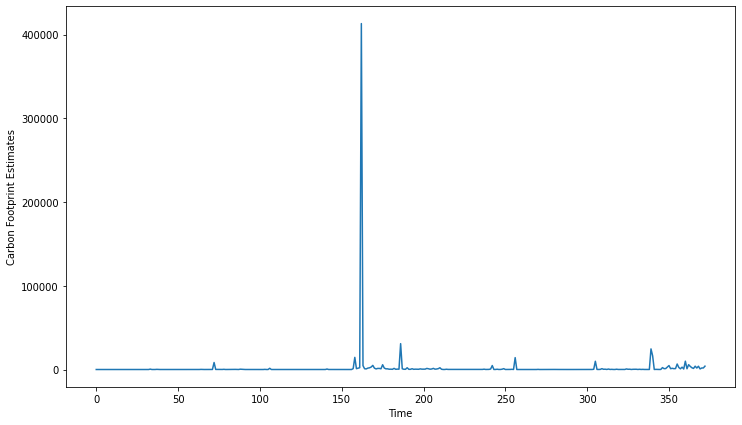

In [107]:
carbon_est['Carbon_Footprint'].plot.line(figsize=(12,7))
# naming the x-axis 
plt.xlabel('Time') 

# naming the y-axis 
plt.ylabel('Carbon Footprint Estimates') 

Text(0, 0.5, 'Power Estimates')

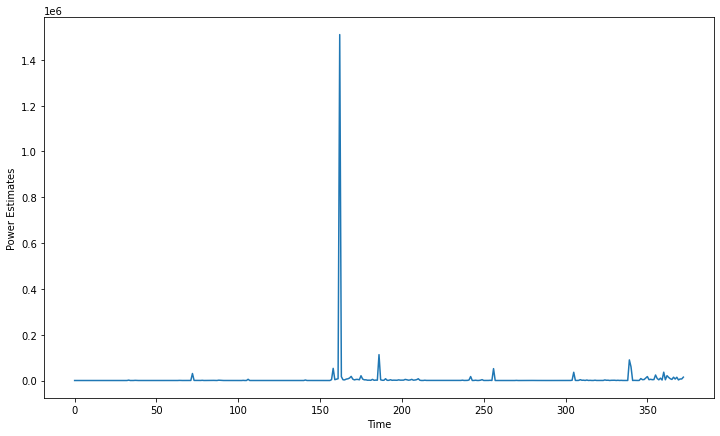

In [108]:
carbon_est['power'].plot.line(figsize=(12,7))
# naming the x axis 
plt.xlabel('Time') 

# naming the y axis 
plt.ylabel('Power Estimates') 

Text(0, 0.5, 'Power')

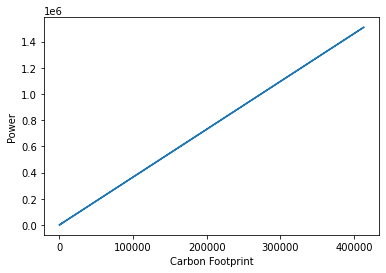

In [109]:
# Graph plot to show relation between Carbon Footprint and Power
plt.plot(final_footprint["Carbon_Footprint"], final_footprint["power"])

# naming the x axis
plt.xlabel('Carbon Footprint')

# naming the y axis
plt.ylabel('Power')

#### From the plots above, we can conclude that the estimated carbon footprint values for various machines can go as high as 2000 however, the lowest carbon footprint points to configurations with low amount of power which makes sense. If power consumption is high, the probability of the carbon footprint getting high is also high, and this is shown in the bottom-most graph which depicts a linear relation between the power and carbon footprint estimates.

In [104]:
# making comparison between power and carbon emission estimates.
comparison = carbon_est[['power', 'Carbon_Footprint']]

Text(0, 0.5, 'carbon Footprint and Power Estimates')

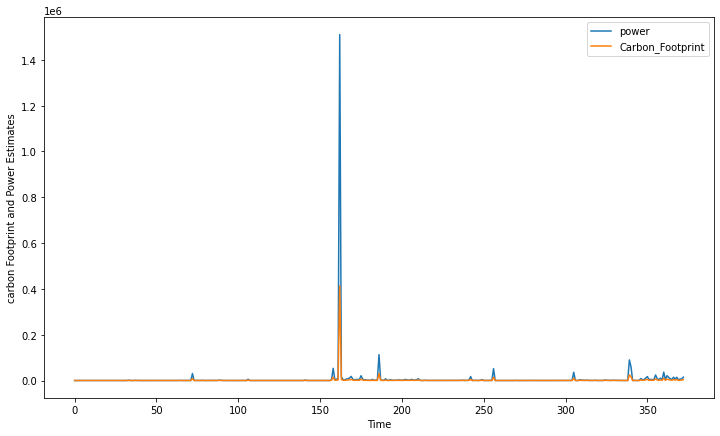

In [110]:
# plot the line graph.
comparison.plot.line(figsize=(12,7))

# naming the x axis 
plt.xlabel('Time') 

# naming the y axis 
plt.ylabel('carbon Footprint and Power Estimates') 

###### Power values are low as compared to the carbon footprint values however, when power gets lower, carbon footprint gets low as well.

### Summary.
We first started by cloning a github repository that contains the dataset with the scale out values recorded on the json files per vm instance. Merging these files and converting them into a pandas dataframe was the best move to generate a better dataset which we can use both for training and evaluation. Two machine learning models are then built from the scaleout dataset and carbon footprint data respectively. Using the footprints and runtime estimates, we successfully generated power per vm instance and then got the carbon footprints produced per vm and with that, we can get the vm instance and configurations with the lowest footprint, i.e, machine that causes least harm to the environment.

In [106]:
# Export the configurations in the form of excel.

drive.mount('/content/drive')
path = '/content/drive/My Drive/SparkAnalysis/configurations1.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  sorted.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
